# Benchmarking

Notebook to organise benchmarks of different implementations of the common-nearest-neighbour clustering and other cluster algorithms:

  - DBSCAN (`sklearn.cluster.DBSCAN`)
  - HDBSCAN ()
  - OPTICS (`sklearn.cluster.OPTICS`)
  - Density peaks ()
  - Jarvis-Patrick ()
  - Common-nearest-neighbours (`cnnclustering.cnn`)
  - Common-nearest-neighbours (`sklearn_extra.cluster.CommonNNClustering`)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-requirements" data-toc-modified-id="Pre-requirements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-requirements</a></span></li><li><span><a href="#Version-info" data-toc-modified-id="Version-info-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Version info</a></span></li><li><span><a href="#Helper-function-definitions" data-toc-modified-id="Helper-function-definitions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helper function definitions</a></span><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Test-data-set-generation" data-toc-modified-id="Test-data-set-generation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Test data set generation</a></span></li><li><span><a href="#Benchmark-organisation" data-toc-modified-id="Benchmark-organisation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Benchmark organisation</a></span></li><li><span><a href="#Profiling" data-toc-modified-id="Profiling-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Profiling</a></span></li></ul></li><li><span><a href="#Consitency-check" data-toc-modified-id="Consitency-check-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Consitency check</a></span><ul class="toc-item"><li><span><a href="#scikit-learn-DBSCAN" data-toc-modified-id="scikit-learn-DBSCAN-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>scikit-learn DBSCAN</a></span></li><li><span><a href="#scikit-learn-extra-CommonNNClustering" data-toc-modified-id="scikit-learn-extra-CommonNNClustering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>scikit-learn-extra CommonNNClustering</a></span></li><li><span><a href="#cnnclustering-CNN-from-points-on-the-fly" data-toc-modified-id="cnnclustering-CNN-from-points-on-the-fly-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>cnnclustering CNN from points on-the-fly</a></span></li><li><span><a href="#cnnclustering-CNN-from-points-bulk" data-toc-modified-id="cnnclustering-CNN-from-points-bulk-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>cnnclustering CNN from points bulk</a></span></li><li><span><a href="#cnnclustering-CNN-from-distances-on-the-fly" data-toc-modified-id="cnnclustering-CNN-from-distances-on-the-fly-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>cnnclustering CNN from distances on-the-fly</a></span></li><li><span><a href="#cnnclustering-CNN-from-distances-bulk" data-toc-modified-id="cnnclustering-CNN-from-distances-bulk-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>cnnclustering CNN from distances bulk</a></span></li><li><span><a href="#scikit-learn-OPTICS-(DBSCAN)" data-toc-modified-id="scikit-learn-OPTICS-(DBSCAN)-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>scikit-learn OPTICS (DBSCAN)</a></span></li><li><span><a href="#scikit-learn-OPTICS-(XI)" data-toc-modified-id="scikit-learn-OPTICS-(XI)-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>scikit-learn OPTICS (XI)</a></span></li></ul></li><li><span><a href="#Timings" data-toc-modified-id="Timings-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Timings</a></span><ul class="toc-item"><li><span><a href="#Blobs-set" data-toc-modified-id="Blobs-set-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Blobs set</a></span></li></ul></li><li><span><a href="#Fit-variants" data-toc-modified-id="Fit-variants-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fit variants</a></span><ul class="toc-item"><li><span><a href="#From-neighbours" data-toc-modified-id="From-neighbours-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>From neighbours</a></span><ul class="toc-item"><li><span><a href="#From-list-of-sets" data-toc-modified-id="From-list-of-sets-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>From list of sets</a></span><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-6.1.1.1"><span class="toc-item-num">6.1.1.1&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Stdlib-index" data-toc-modified-id="Stdlib-index-6.1.1.2"><span class="toc-item-num">6.1.1.2&nbsp;&nbsp;</span>Stdlib index</a></span></li><li><span><a href="#Stdlib-cython" data-toc-modified-id="Stdlib-cython-6.1.1.3"><span class="toc-item-num">6.1.1.3&nbsp;&nbsp;</span>Stdlib cython</a></span></li></ul></li><li><span><a href="#From-numpy.array" data-toc-modified-id="From-numpy.array-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>From numpy.array</a></span></li><li><span><a href="#Check-in-CNN-class-context" data-toc-modified-id="Check-in-CNN-class-context-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Check in CNN class context</a></span></li></ul></li><li><span><a href="#From-density-graph" data-toc-modified-id="From-density-graph-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>From density graph</a></span><ul class="toc-item"><li><span><a href="#From-SparsegraphArray" data-toc-modified-id="From-SparsegraphArray-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>From SparsegraphArray</a></span></li></ul></li></ul></li></ul></div>

## Pre-requirements

In [1]:
from collections import Counter
import importlib
from operator import itemgetter
import sys
import time

from IPython.core.display import display, HTML
import numpy as np

# %matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

import debacl
import hdbscan
import pydpc
import sklearn
import sklearn_extra 
from sklearn import cluster as skcluster
from sklearn_extra import cluster as skextracluster
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

import cnnclustering
from cnnclustering import _cfits  # Cythonised fit implementation
from cnnclustering import _fits   # Python fit implementation
from cnnclustering import cnn

# Jupyter extensions
%load_ext Cython
%load_ext line_profiler
%load_ext memory_profiler

In [2]:
# Matplotlib configuration
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rc_file("../matplotlibrc", use_default_template=False)

In [3]:
# Jupyter notebook configuration
display(HTML("<style>.container { width:85% !important; }</style>"))

## Version info

In [4]:
print(f"{'Python':>20} :  ", *sys.version.splitlines())

modules = [
    ('scikit-learn', sklearn),
    ('scikit-learn-extra', sklearn_extra),
    ('cnnclustering', cnnclustering),
    ('hdbscan', hdbscan),
]

for alias, m in modules:
    try:
        print(f"{alias:>20} :  ", m.__version__)
    except AttributeError:
        print(f"{alias:>20} :  ", "no version info")

              Python :   3.8.5 | packaged by conda-forge | (default, Aug 21 2020, 18:21:27)  [GCC 7.5.0]
        scikit-learn :   0.23.2
  scikit-learn-extra :   0.1.0b2
       cnnclustering :   0.3.11
             hdbscan :   no version info


## Helper function definitions

### Plots

In [4]:
# Axis property defaults for the plots
ax_props = {
    "xlabel": None,
    "ylabel": None,
    "xlim": (-2.5, 2.5),
    "ylim": (-2.5, 2.5),
    "xticks": (),
    "yticks": (),
    "aspect": "equal"
}

In [5]:
def plot_data(data, labels=None, ax=None, noise=0):
    """Take a data set and cluster labels to make a basic 2D dot plot
    
    Args:
        data: Numpy `numpy.ndarray` of shape (#points, 2) with x, y
            coordinates of points in 2D
        labels: Numpy `numpy.ndarray` of shape (#points,) and
            `dtype = int` holding cluster label assignments for all
            points.  If `None`, will plot the data set without
            point colouring by label.
        ax: Matplotlib `matplotlib.axes.SubplotBase` instance to
            attach the plot to.  If `None`, wil create a new instance.
        noise: Integer label used to mark point as noise (no cluster
            assignment; Usually 0 or -1). 
    """

    if ax is None:
        plt.close('all')
        fig, ax = plt.subplots(
            figsize=(
                mpl.rcParams["figure.figsize"][0] / 2,
                mpl.rcParams["figure.figsize"][1]
                )
            )
    else:
        fig = ax.get_figure()
        
    if labels is None:
        ax.plot(
            *data.T,
            linestyle="",
            color="None",
            marker="o",
            markersize=4,
            markerfacecolor="white",
            markeredgecolor="k",
            )

    else:
        ax.plot(
            *data[np.where(labels == noise)[0]].T,
            linestyle="",
            color="None",
            marker="o",
            markersize=4,
            markerfacecolor="gray",
            markeredgecolor="k",
            )

        for cluster_number in range(noise + 1 , int(np.max(labels)) + 1):
            ax.plot(
                *data[np.where(labels == cluster_number)[0]].T,
                linestyle="",
                marker="o",
                markersize=4,
                markeredgecolor="k",
                )

    ax.set(**{
        "xticks": (),
        "yticks": (),
        "xticklabels": (),
        "yticklabels": (),
        "aspect": "equal"
        })

### Test data set generation

Data set generation functions should be generally designed in such a way that they expect exactly one argument *n* and return a 2D data set of *n* sample points. A `label` attribute can be optionally added to the function object for identification.

In [6]:
# Global seed for data set generation functions
np.random.seed(42)

In [7]:
# circles
def gen_circles(n):
    circles, _ = datasets.make_circles(
        n_samples=n,
        factor=.5,
        noise=.05,
        random_state=10
        )
    
    return StandardScaler().fit_transform(circles)

gen_circles.label = "circles"

# blobs                            
def gen_blobs(n):
    blobs, _ = datasets.make_blobs(
        centers=[[-10, -10], [10, -10], [10, 10]],
        n_samples=n,
        random_state=10
    )
    return StandardScaler().fit_transform(blobs)

gen_blobs.label = "blobs"

# moons
def gen_moons(n):
    moons, _ = datasets.make_moons(
        n_samples=n,
        noise=.05,
        random_state=10
        )
    
    return StandardScaler().fit_transform(moons)

gen_moons.label = "moons"

def gen_no_structure(n):
    no_structure = np.random.rand(n, 2)
    
    return StandardScaler().fit_transform(no_structure)

gen_no_structure.label = "None"

def gen_aniso(n):
    X, y = datasets.make_blobs(
        n_samples=n,
        random_state=170
        )

    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    aniso = np.dot(X, transformation)
    
    return StandardScaler().fit_transform(aniso)

gen_aniso.label = "aniso"

def gen_varied(n):
    varied, _ = datasets.make_blobs(
        n_samples=n,
        cluster_std=[1.0, 2.5, 0.5],
        random_state=170)
    
    return StandardScaler().fit_transform(varied)

gen_varied.label = "varied"

### Benchmark organisation

In [8]:
class DS:
    """Benchmark class to represent a data set
    
    Initialise a `DS` instance with a data set generation function.
    
    Attributes:
       points: A (2D) sample data set
       prepare_neighbourhoods: Pre-compute neighbourhoods
    """

    def __init__(
            self, gen_fxn, n, gen_fxn_args=None, gen_fxn_kwargs=None):
        self.gen_fxn = gen_fxn
        self.n = n
        
        if gen_fxn_kwargs is None:
            gen_fxn_kwargs = {}
        if gen_fxn_args is None:
            gen_fxn_args = ()  
        
        self.points = gen_fxn(n, *gen_fxn_args, **gen_fxn_kwargs)
        self.distances = None       # Pre-computed distances
        self.neighbourhoods = None  # Pre-computed neighbourhoods
        self.r = None               # Neighbourhood computation radius
        self.timeits = {}           # Timing results
        
    def prepare_distances(self):
        self.distances = cdist(self.points, self.points)
        
    def prepare_neighbourhoods(self, r, numpy=False):
        """Pre-compute neighbourhoods at a given readius `r`
        
        Uses `sklearn.neighbors.NearestNeighbors`.
        
        Args:
            numpy: If `True`, returns a `numpy.ndarray` of shape
            (#points,) containing the neighbours of each points as
            `numpy.ndarray` of shape (#neighbours,).  If `False`,
            returns a `list` of `sets` instead.
        """

        neighbour_model = NearestNeighbors(radius=r).fit(self.points)
        neighbours = neighbour_model.radius_neighbors(
            self.points, return_distance=False
            )
        
        # Remove self-counting
        neighbours = [set(x) for x in neighbours]   
        for c, s in enumerate(neighbours):
            s.remove(c)
        if numpy:
            neighbours = np.array(
                [np.array([y for y in x]) for x in neighbours],
                dtype=object
                )    
        
        self.neighbourhoods = neighbours
        self.r = r
        
    def __str__(self):
        try:
            desc_gen = self.gen_fxn.label
        except AttributeError:
            desc_gen = self.gen_fxn.__name__
            
        # p: from points
        # d: from distances
        # n: from neighbours
        
        if self.neighbourhoods is not None:
            desc_from = f"n{self.r}"
        elif self.dist is not None:
            desc_from = f"d"
        else:
            desc_from = f"p"
            
        return f"{desc_gen}_{self.n}_{desc_from}"
    
    
    def ratios(self, base=None):
        """Show relative performance of runs based on `timeits` dict"""

        if base is not None:
            base = self.timeits[base].average
        else:
            base = min(x.average for x in self.timeits.values())
            
        return sorted([
            (k, v.average / base)
            for k, v in self.timeits.items()
            ], key=itemgetter(1))
        

In [9]:
# Benchmark fixture 1
def prepare_neighbours(n, r, gen_fxn, numpy=False):
    """Provide pre-computed neighbourhoods
    
    Uses `sklearn.neighbors.NearestNeighbors`. Removes self-counting
    of points as neighbours of themselves.
    
    Args:
       n: Number of data points
       r: Radius
       gen_fxn: Function that accepts one parameter `n` and returns
           a data set with `n` points, for which neighbourhoods will
           be computed.
       numpy: If `True`, provide neighbourhoods as 1D `numpy.array` of 1D
           `numpy.array`s.  If `False`, convert to `list` of `set`s.  
    """
    
    data = gen_fxn(n)
    neighbour_model = NearestNeighbors(radius=r).fit(data)
    neighbours = neighbour_model.radius_neighbors(data, return_distance=False)
    neighbours = [set(x) for x in neighbours]
    for c, s in enumerate(neighbours):
        # Remove self-counting 
        s.remove(c)
    if numpy:
        # Reconvert to numpy.array
        neighbours = np.array([np.array([y for y in x]) for x in neighbours])
        
    return neighbours

In [10]:
def pydpc_cluster(data, **params):
    dpcclustering = pydpc.Cluster(data, autoplot=False)
    dpcclustering.assign(**params)
    return dpcclustering

In [11]:
def optics(data, **params):
    clustering = skcluster.OPTICS(**params)
    clustering.fit(data)
    return clustering

In [12]:
def hdbscan_cluster(data, **params):
    clustering = hdbscan.HDBSCAN(**params)
    clustering.fit(data)
    return clustering

### Profiling

In [13]:
def profile_fxn(
        f, ds, report_dir, *args,
        t=True, l=True, label=None, validate=True, **kwargs):
    """Function profiling procedure
    
    Runs %lprun and %timeit line magic on a globally defined function
    `fxn`.  Function args and kwargs need to be defined globally as
    well.  This is necessary, because (at least lprun) line magic does
    not seem to work well with local variables, e.g. the following
    alternative did not work (raises `NameError`): 
    
       def profile_fxn(fxn, *args, **kwargs):
           %lprun -f fxn fxn(*args, **kwargs)
           ...
    
    This function expects a :obj:`DS` object, providing a dataset and
    pre-calculated values if necessary.  Report details are deduced from
    this object.  Timings are saved to the object.
    
    Args:
       f (:obj:`func`): Function to profile.
       ds (:obj:`DS`): Data set object.
       report_dir (str): Output directory file path.
       *args: Arguments passed to `f`
    
    Keyword args:
       t (bool): If `True`, time function call with timeit line magic
       l (bool): If `True`, line profile function call with lpro line magic
       label (optional, str): Label to identify the run.  If `None`,
          `fxn.__name__` is used.
       validate (bool): If True, execute function call once to evaluate
          the result before the benchmark
        
       **kwargs: Keyword arguments passed to `f`.
          
    Returns:
       None  
    """
    
    global fxn
    global fxn_args
    global fxn_kwargs
    
    fxn = f
    fxn_args = args
    fxn_kwargs = kwargs
    
    if validate:
        # Validate function result (experimental)
        result = fxn(*fxn_args, **fxn_kwargs)
            
        # Convert result if not labels array
        if isinstance(result, list) and isinstance(result[0], np.ndarray):
            # Convert result if from original implementation (baseline)
            result = baseline_to_labels(result)
    
        if result is not None:
            noise = 0
            frequencies = Counter(result)
            if 0 in frequencies:
                noise = frequencies.pop(0)

            largest = frequencies.most_common(1)[0][1] if frequencies else 0
            clusters = len(frequencies)

            print(f"Length of labels:    {len(result)}")
            print(f"Noise:               {noise}")
            print(f"Largest:             {largest}")
            print(f"Clusters:            {clusters}")
    
    # Profile
    if l:
        %lprun -T {report_dir}/{fxn.__name__}_{ds.__str__()}.lprun -f fxn fxn(*fxn_args, **fxn_kwargs)
    if t:
        o = %timeit -q -o fxn(*fxn_args, **fxn_kwargs)

        if label is None:
            label = fxn.__name__
        ds.timeits.update({label: o})

In [14]:
def baseline_to_labels(result):
    """Convert result from original implementation (baseline)"""

    len_ = len(result)
    result = [x for x in result if isinstance(x, np.ndarray)]
    result_ = np.zeros(len_)
    for c, cluster in enumerate(result, 1):
        for member in cluster:
            result_[member] = c
    result = result_

    return result

In [15]:
def sub_ds_args(args, ds):
    args = list(args)
    for i, arg in enumerate(args):
        if not isinstance(arg, str):
            continue
        if arg.startswith("DS_ATTR:"):
            attr = arg.split(":")[-1]
            args[i] = getattr(ds, attr)
    return tuple(args)

In [16]:
def DefaultDSConstructor(*args, **kwargs):
    return DS(*args, **kwargs)

In [17]:
def PointsDSConstructor(*args, **kwargs):
    ds = DS(*args, **kwargs)
    ds.points = cnn.Points(ds.points)
    return ds

In [18]:
def DistanceDSConstructor(*args, **kwargs):
    ds = DS(*args, **kwargs)
    ds.prepare_distances()
    ds.distances = cnn.Distances(ds.distances)
    return ds

In [19]:
def time_runs(
        signatures, gen_fxn, ds_constructor=DefaultDSConstructor,
        timings=None, samples=None, v=True,):

    if timings is None:
        timings = {}
        
    if samples is None:
        samples = []
    
    for n in samples:
        ds = ds_constructor(gen_fxn, n)
        for label, f, args, KWARGS in signatures:
            args = sub_ds_args(args, ds)
            kwargs = KWARGS.get(n, KWARGS.get("default", {}))

            profile_fxn(
                f, ds, "/dev/null",
                *args,           # function args
                l=False,         # no line profiling
                label=label,
                validate=False,  
                **kwargs         # function kwargs
                )
        
        timings[n] = ds.timeits

        if v:
            print("-" * 80)
            print(n)
            for x in ds.ratios():
                print(f"{x[0]:>30}: {x[1]:7.3f}")
                
    return timings

## Consitency check

Ensure that every implementation delivers a consistent cluster result for test data sets.

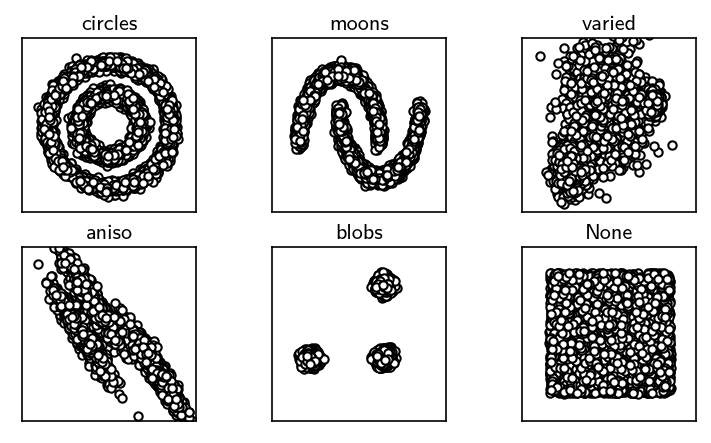

In [21]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

for count, gen_fxn in enumerate(generation_fxns):
    # Plot
    plot_data(gen_fxn(5000), ax=Ax[count])
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

### scikit-learn DBSCAN

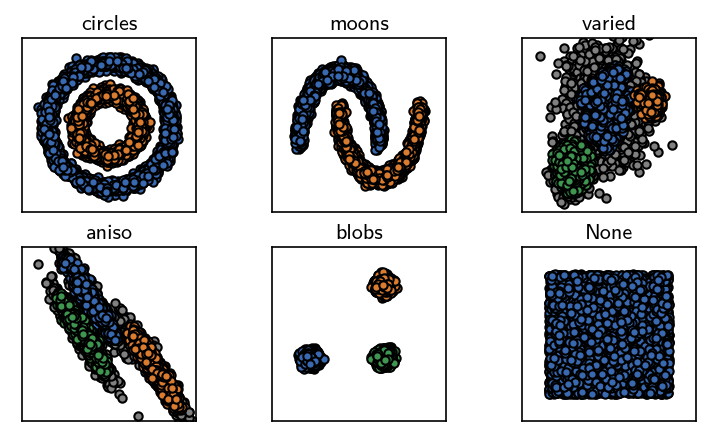

In [16]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"eps": 0.2, "min_samples": 5},    # circles
    {"eps": 0.2, "min_samples": 5},    # moons
    {"eps": 0.14, "min_samples": 20},  # varied
    {"eps": 0.11, "min_samples": 20},  # aniso
    {"eps": 0.2, "min_samples": 5},    # blobs
    {"eps": 0.2, "min_samples": 5},    # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    labels = skcluster.dbscan(data, **params)[1]
    
    # Plot
    plot_data(data, labels=labels, ax=Ax[count], noise=-1)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

### scikit-learn-extra CommonNNClustering

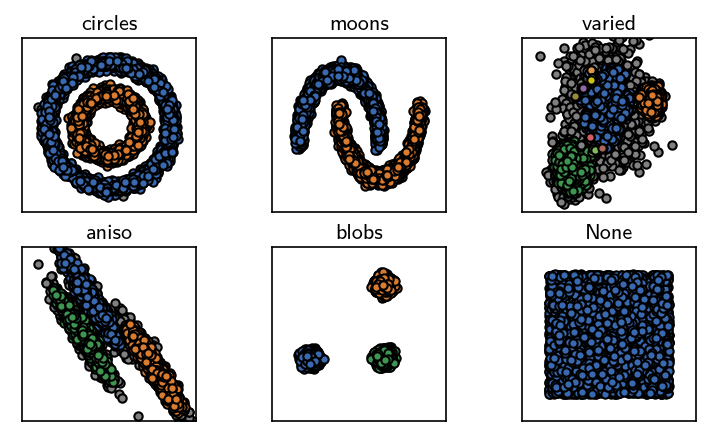

In [17]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"eps": 0.2, "min_samples": 5},    # circles
    {"eps": 0.2, "min_samples": 5},    # moons
    {"eps": 0.18, "min_samples": 20},  # varied
    {"eps": 0.15, "min_samples": 10},  # aniso
    {"eps": 0.2, "min_samples": 5},    # blobs
    {"eps": 0.2, "min_samples": 5},    # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    labels = skextracluster.commonnn(data, **params)
    
    # Plot
    plot_data(data, labels=labels, ax=Ax[count], noise=-1)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

### cnnclustering CNN from points on-the-fly

Execution time for call of fit: 0 hours, 0 minutes, 1.5430 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
5000      0.200     5         2         None      2         0.500     0.001     
--------------------------------------------------------------------------------
Execution time for call of fit: 0 hours, 0 minutes, 1.6972 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
5000      0.200     5         2         None      2         0.500     0.000     
--------------------------------------------------------------------------------
Execution time for call of fit: 0 hours, 0 minutes, 2.4111 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  

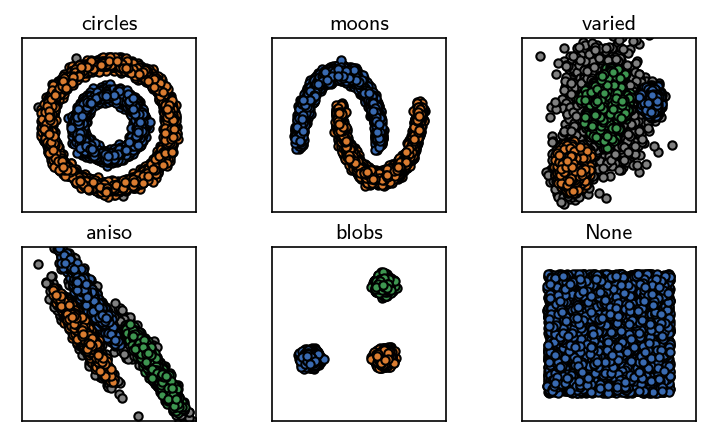

In [19]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # circles
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # moons
    {"radius_cutoff": 0.18, "cnn_cutoff": 20, "member_cutoff": 8},  # varied
    {"radius_cutoff": 0.15, "cnn_cutoff": 10},                      # aniso
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # blobs
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    clustering = cnn.CNN(data)
    clustering.fit(**params, rec=True, policy="conservative")
    
    # Plot
    plot_data(data, labels=clustering.labels, ax=Ax[count], noise=0)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

### cnnclustering CNN from points bulk

Execution time for call of fit: 0 hours, 0 minutes, 0.1772 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
5000      0.200     5         2         None      2         0.500     0.001     
--------------------------------------------------------------------------------
Execution time for call of fit: 0 hours, 0 minutes, 0.1856 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
5000      0.200     5         2         None      2         0.500     0.000     
--------------------------------------------------------------------------------
Execution time for call of fit: 0 hours, 0 minutes, 0.3288 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  

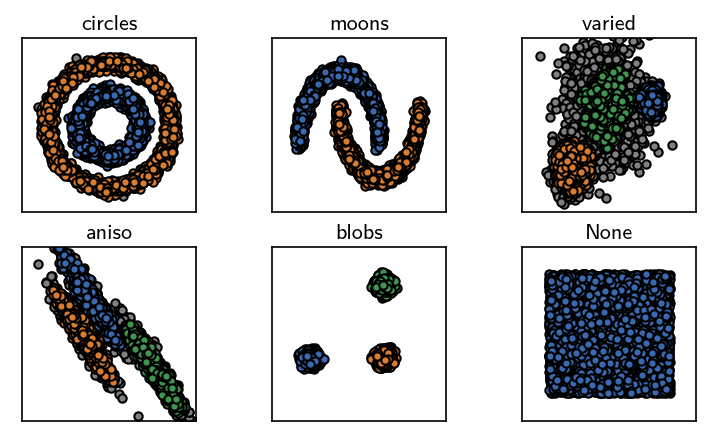

In [20]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # circles
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # moons
    {"radius_cutoff": 0.18, "cnn_cutoff": 20, "member_cutoff": 8},  # varied
    {"radius_cutoff": 0.15, "cnn_cutoff": 10},                      # aniso
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # blobs
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    clustering = cnn.CNN(data)
    clustering.fit(**params, rec=True, policy="progressive")
    
    # Plot
    plot_data(data, labels=clustering.labels, ax=Ax[count], noise=0)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

### cnnclustering CNN from distances on-the-fly

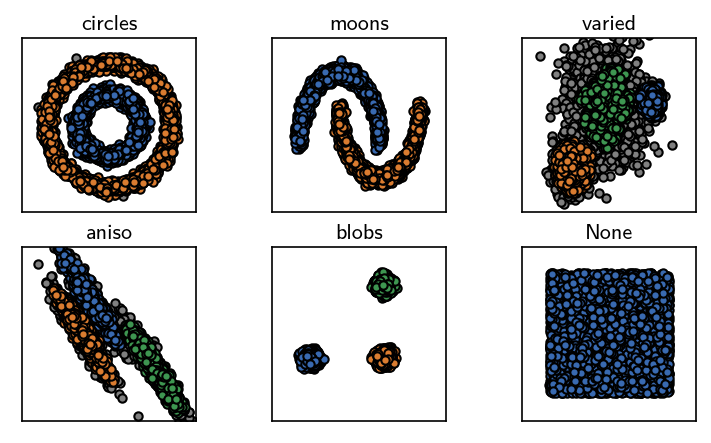

In [21]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # circles
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # moons
    {"radius_cutoff": 0.18, "cnn_cutoff": 20, "member_cutoff": 8},  # varied
    {"radius_cutoff": 0.15, "cnn_cutoff": 10},                      # aniso
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # blobs
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    clustering = cnn.CNN(data)
    clustering.calc_dist()
    clustering.fit(**params, rec=False, policy="conservative")
    
    # Plot
    plot_data(data, labels=clustering.labels, ax=Ax[count], noise=0)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

### cnnclustering CNN from distances bulk

/home/janjoswig/CNN/cnnclustering/cnn.py:1784: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  neighbourhoods = np.array([
/home/janjoswig/CNN/cnnclustering/cnn.py:1784: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  neighbourhoods = np.array([
/home/janjoswig/CNN/cnnclustering/cnn.py:1784: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ne

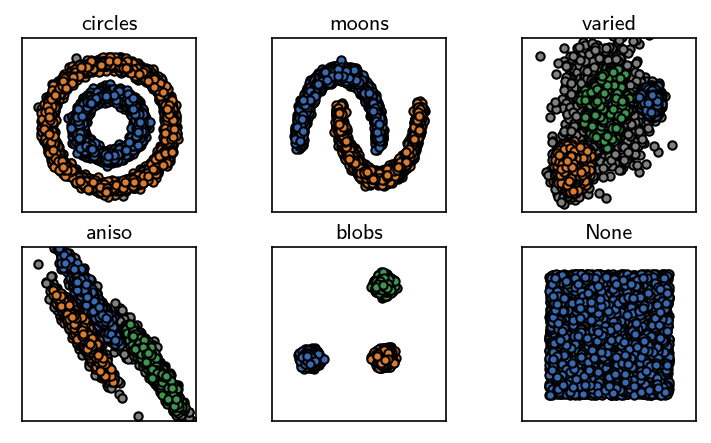

In [22]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # circles
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # moons
    {"radius_cutoff": 0.18, "cnn_cutoff": 20, "member_cutoff": 8},  # varied
    {"radius_cutoff": 0.15, "cnn_cutoff": 10},                      # aniso
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # blobs
    {"radius_cutoff": 0.2, "cnn_cutoff": 5},                        # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    clustering = cnn.CNN(data)
    clustering.calc_dist()
    clustering.fit(**params, rec=False, policy="progressive")
    
    # Plot
    plot_data(data, labels=clustering.labels, ax=Ax[count], noise=0)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

### scikit-learn OPTICS (DBSCAN)

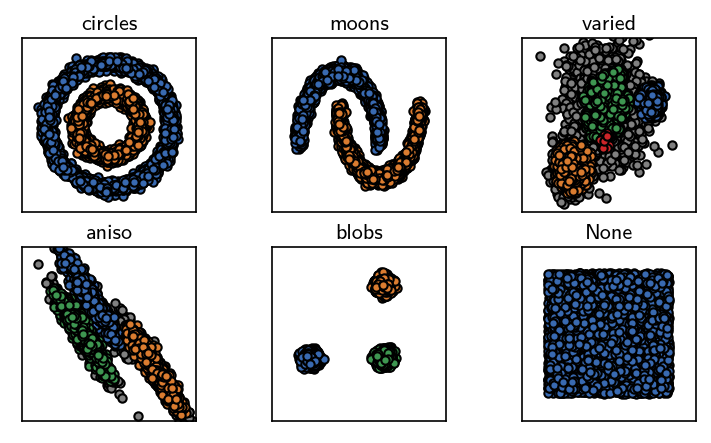

In [23]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"max_eps": 0.25, "min_samples": 5, "cluster_method": "dbscan"},    # circles
    {"max_eps": 0.25, "min_samples": 5, "cluster_method": "dbscan"},    # moons
    {"max_eps": 0.125, "min_samples": 20, "cluster_method": "dbscan"},   # varied
    {"max_eps": 0.15, "min_samples": 20, "cluster_method": "dbscan"},   # aniso
    {"max_eps": 1, "min_samples": 5, "cluster_method": "dbscan"},    # blobs
    {"max_eps": 1, "min_samples": 5, "cluster_method": "dbscan"},    # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    clustering = skcluster.OPTICS(**params)
    clustering.fit(data)
    
    # Plot
    plot_data(data, labels=clustering.labels_, ax=Ax[count], noise=-1)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

### scikit-learn OPTICS (XI)

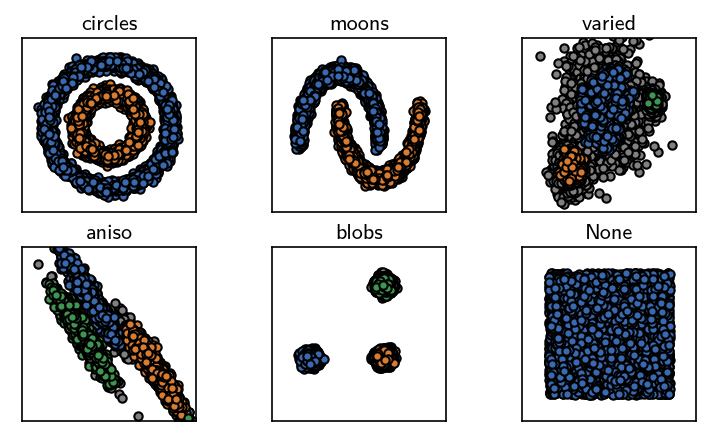

In [24]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.4},    # circles
    {"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.4},    # moons
    {"min_samples": 10, "xi": 0.01, "min_cluster_size": 0.2},   # varied
    {"min_samples": 20, "xi": 0.03, "min_cluster_size": 0.1},   # aniso
    {"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.3},    # blobs
    {"min_samples": 20, "xi": 0.2, "min_cluster_size": 0.2},    # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    clustering = skcluster.OPTICS(**params)
    clustering.fit(data)
    
    # Plot
    plot_data(data, labels=clustering.labels_, ax=Ax[count], noise=-1)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

#### PyDPC

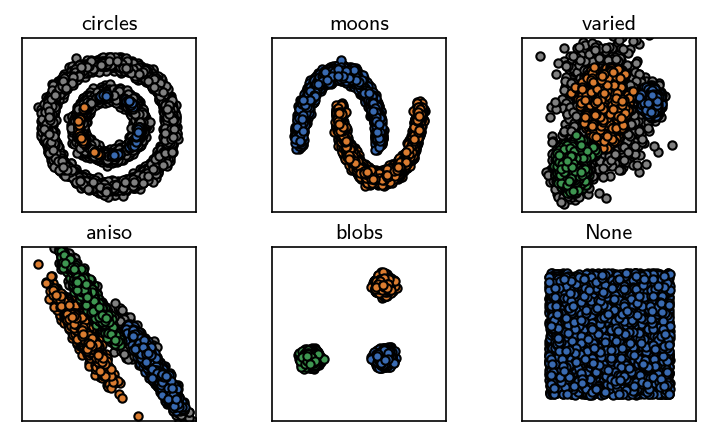

In [52]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"min_density": 100, "min_delta": 1},    # circles
    {"min_density": 100, "min_delta": 2},    # moons
    {"min_density": 1, "min_delta": 0.75},    # varied
    {"min_density": 100, "min_delta": 0.8},    # aniso
    {"min_density": 100, "min_delta": 1},    # blobs
    {"min_density": 125, "min_delta": 2.5},    # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    dpcclustering = pydpc.Cluster(data, autoplot=False)
    dpcclustering.assign(**params)
    labels = (dpcclustering.membership + 1)
    labels[dpcclustering.halo_idx] = 0
    
    # Plot
    plot_data(data, labels=labels, ax=Ax[count], noise=0)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

#### HDBSCAN

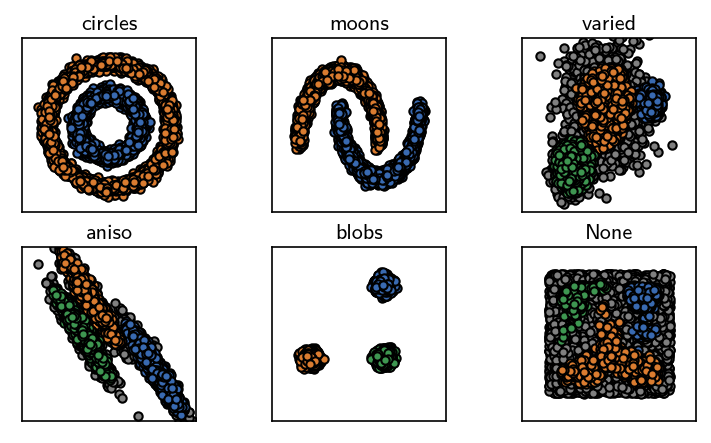

In [65]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"min_cluster_size": 5, "gen_min_span_tree": True},    # circles
    {"min_cluster_size": 5, "gen_min_span_tree": True},    # moons
    {"min_cluster_size": 50, "gen_min_span_tree": True},   # varied
    {"min_cluster_size": 20, "gen_min_span_tree": True},   # aniso
    {"min_cluster_size": 5, "gen_min_span_tree": True},    # blobs
    {"min_cluster_size": 200, "gen_min_span_tree": True},  # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    clustering = hdbscan.HDBSCAN(**params)
    clustering.fit(data)
    labels = (clustering.labels_ + 1)
    labels[clustering.probabilities_ < 0.1] = 0
    
    # Plot
    plot_data(data, labels=labels, ax=Ax[count], noise=0)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

#### DeBaCl (Officially Python 2 only)

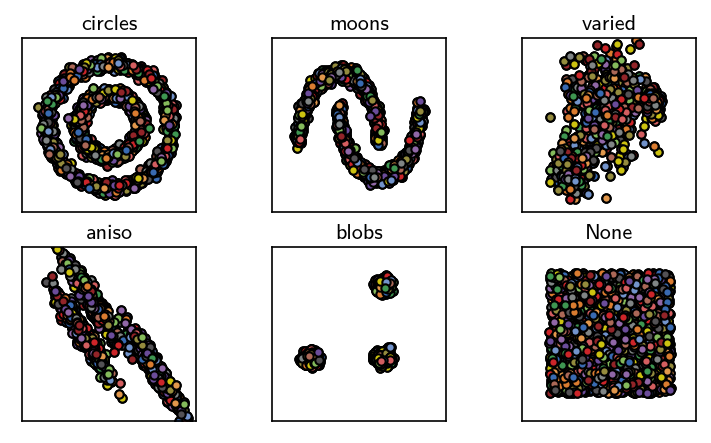

In [20]:
# Plot the test data sets
plt.close("all")
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

generation_fxns = [
    gen_circles, gen_moons, gen_varied,
    gen_aniso, gen_blobs, gen_no_structure,
    ]

fit_params = [
    {"k": 10, "prune_threshold": 10},   # circles
    {"k": 10, "prune_threshold": 10},   # moons
    {"k": 10, "prune_threshold": 10},   # varied
    {"k": 10, "prune_threshold": 10},   # aniso
    {"k": 10, "prune_threshold": 10},   # blobs
    {"k": 10, "prune_threshold": 10},   # no structure
    ]

for count, (gen_fxn, params) in enumerate(zip(generation_fxns, fit_params)):
    # Fit
    data = gen_fxn(5000)
    tree = debacl.construct_tree(data, **params)
    labels = tree.get_clusters() + 1
    
    # Plot
    plot_data(data, labels=labels, ax=Ax[count], noise=0)
    Ax[count].set(**ax_props)
    
    try:
        name = gen_fxn.label
    except AttributeError:
        name = gen_fxn.__name__

    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0.05, top=0.9, wspace=0, hspace=0.2 
    )

plt.show()

## Timings

### Blobs set

#### Points

In [24]:
benchmark_signatures_points = [  # alias, cluster object, input reference, parameters[samples]
    ("CommonNN (cons.)", cnn.fit, ("DS_ATTR:points", ),
         {"default": {"radius_cutoff": 0.2, "cnn_cutoff": 5,
                      "v": False, "rec": False, "sort_by_size": False, "info": False, "policy": "conservative"}}),
    ("CommonNN (progr.)", cnn.fit, ("DS_ATTR:points", ),
         {"default": {"radius_cutoff": 0.2, "cnn_cutoff": 5,
                      "v": False, "rec": False, "sort_by_size": False, "info": False, "policy": "progressive"}}),
    ("CommonNN (sklearn)", skextracluster.commonnn, ("DS_ATTR:points", ), {"default": {"eps": 0.2, "min_samples": 5}}),
    ("DBSCAN", skcluster.dbscan, ("DS_ATTR:points", ), {"default": {"eps": 0.2, "min_samples": 5}}),
    ("OPTICS(DBSCAN)", optics, ("DS_ATTR:points", ), {"default": {"max_eps": 1, "min_samples": 5, "cluster_method": "dbscan"}}),
    ("OPTICS(XI)", optics, ("DS_ATTR:points", ), {"default": {"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.3}}),
    ("PyDPC", pydpc_cluster, ("DS_ATTR:points", ), {"default": {"min_density": 100, "min_delta": 1}}),
    ("HDBSCAN", hdbscan_cluster, ("DS_ATTR:points", ), {"default": {"min_cluster_size": 5, "gen_min_span_tree": True}})
]

In [33]:
# TIMINGS_POINTS = {}
samples = [1000, 5000, 10000]
TIMINGS_POINTS.update(time_runs(benchmark_signatures_points, gen_blobs, ds_constructor=PointsDSConstructor, samples=samples))

--------------------------------------------------------------------------------
1000
                        DBSCAN:   1.000
              CommonNN_sklearn:   1.302
                       HDBSCAN:   1.979
          CommonNN_progressive:   3.247
                         PyDPC:   5.488
         CommonNN_conservative:  11.519
                OPTICS(DBSCAN):  58.906
                    OPTICS(XI):  61.855
--------------------------------------------------------------------------------
5000
                       HDBSCAN:   1.000
                        DBSCAN:   1.672
              CommonNN_sklearn:   3.840
          CommonNN_progressive:   6.533
                         PyDPC:  16.036
         CommonNN_conservative:  29.598
                OPTICS(DBSCAN):  45.044
                    OPTICS(XI):  49.431
--------------------------------------------------------------------------------
10000
                       HDBSCAN:   1.000
                        DBSCAN:   1.587
              CommonN

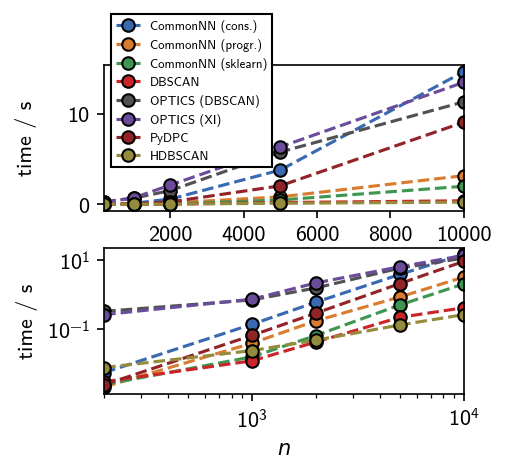

In [67]:
plt.close("all")
fig, ax = plt.subplots(
    2, 1, figsize=(3.33, 3)
    )

samples = np.asarray(list(TIMINGS_POINTS.keys()))
sorti = np.argsort(samples)
samples = samples[sorti]
functions = TIMINGS_POINTS[200].keys()
for f in functions:
    times = np.asarray([v[f].average for k, v in TIMINGS_POINTS.items()])
    times = times[sorti]
    ax[0].plot(
        samples, times,
        label=f,
        linestyle="--",
        marker="o",
        markeredgecolor="k"
        )
    ax[1].plot(
        samples, times,
        label=f,
        linestyle="--",
        marker="o",
        markeredgecolor="k"        
        )
ax[0].legend(
    ["CommonNN (cons.)", "CommonNN (progr.)", "CommonNN (sklearn)",
     "DBSCAN", "OPTICS (DBSCAN)", "OPTICS (XI)", "PyDPC", "HDBSCAN"],
    fancybox=False, framealpha=1, edgecolor="k", fontsize="xx-small",
    loc=(0.02, 0.3)
    )
ax[0].set(**{
    "xlim": (samples[0], samples[-1]),
    "ylabel": ("time / s\n"),
    })
ax[1].set(**{
    "xlim": (samples[0], samples[-1]),
    "xlabel": "$n$",
    "ylabel": ("time / s"),
    "xscale": "log",
    "yscale": "log"
    })
fig.subplots_adjust(0.2, 0.15, 0.92, 0.88, hspace=0.25)
plt.savefig("/home/janjoswig/Documents/Projects/CNN/Manuscript/figures/Benchmark/bm.png")
plt.show()

In [30]:
benchmark_signatures = [
    ("DBSCAN", skcluster.dbscan, ("DS_ATTR:points", ), {"default": {"eps": 0.2, "min_samples": 5}}),
    ("CommonNN", skextracluster.commonnn, ("DS_ATTR:points", ), {"default": {"eps": 0.2, "min_samples": 5}}),
]

In [64]:
# TIMINGS = {}
TIMINGS.update(time_runs(benchmark_signatures, gen_blobs, samples=[20000]))

--------------------------------------------------------------------------------
20000
         DBSCAN:   1.000
       CommonNN:  16.444


In [65]:
fig, ax = plt.subplots()
x = TIMINGS.keys()

lines = []
for l in ["DBSCAN", "CommonNN"]:
    x, y = zip(*[
        [k, v[l].average]
        for k, v in TIMINGS.items()
        if v.get(l, None) is not None
    ])
    lines.append(ax.plot(x, y))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[[200, 0.001104492306285725],
 [2000, 0.0010950690424282844],
 [5000, 0.0010891374409994958]]

## Fit variants

Benchmarks for different approaches to the common-nearest-neighbours fit function.

In [13]:
# Benchmark results will be saved under:
report_dir = "reports/T460"
# report_dir = "reports/qcw21"
# report_dir = "reports/qcm07"

### From neighbours

Tests of fit functions taking pre-computed neighbourhoods as input. Two ways of setting up the benchmarks are provided:
  - Use `prepare_neighbours` function to quickly generate the input data
  - Use `DS` benchmark class to organise different runs on essentially the same data set

In [30]:
ds = DS(gen_circles, 100)

#### From list of sets

In [25]:
# Prepare neighbours as list of sets
ds.prepare_neighbourhoods(0.5)
print(ds)

circles_2000_n0.5


##### Baseline

In [110]:
# Implementation using original implementation
profile_fxn(
    fits.fit_from_neighbours_baseline,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="baseline"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_from_neighbours_baseline_circles_2000_n0.5.lprun'. 
256 ms ± 5.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### Stdlib index

In [47]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=np.asarray(fits.fit_stdlib_from_neighbours_index(20, ds.neighbourhoods)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [45]:
# Implementation using only standard library
profile_fxn(
    fits.fit_stdlib_from_neighbours_index,
    ds, report_dir,
    20, ds.neighbourhoods,  # function args
    label="std_index"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_stdlib_from_neighbours_index_circles_2000_n0.5.lprun'. 
36.3 ms ± 88 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [111]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=np.asarray(fits.fit_stdlib_from_neighbours_loop(20, ds.neighbours)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [113]:
# Implementation using only standard library
profile_fxn(
    fits.fit_stdlib_from_neighbours_loop,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="std_loop"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_stdlib_from_neighbours_loop_circles_2000_n0.5.lprun'. 
40 ms ± 511 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [114]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=np.asarray(fits.fit_stdlib_from_neighbours_loop_membercheck(20, ds.neighbours)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [115]:
# Implementation using only standard library
profile_fxn(
    fits.fit_stdlib_from_neighbours_loop_membercheck,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="std_loop_membercheck"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_stdlib_from_neighbours_loop_membercheck_circles_2000_n0.5.lprun'. 
41.8 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


##### Stdlib cython

In [29]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=np.asarray(_cfits.fit_from_neighbours(20, ds.neighbourhoods)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [31]:
# Implementation using only standard library
profile_fxn(
    _cfits.fit_from_neighbours,
    ds, report_dir,
    20, ds.neighbourhoods,  # function args
    label="std_cython"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2


ValueError: max() arg is an empty sequence

In [32]:
%timeit _cfits.fit_from_neighbours(20, ds.neighbourhoods)

25.8 ms ± 541 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### From numpy.array

In [136]:
importlib.reload(fits)

<module 'snippets.fits' from '/home/janjoswig/CNN/tests/benchmark/snippets/fits.py'>

In [118]:
# Switch to neighbourhoods as numpy.array of numpy.arrays
ds.prepare_neighbours(0.5, numpy=True)

In [142]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=baseline_to_labels(fits.fit_from_neighbours_baseline(20, ds.neighbours)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [140]:
# Implementation using original implementation
profile_fxn(
    fits.fit_from_neighbours_baseline,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="baseline"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_from_neighbours_baseline_circles_2000_n0.5.lprun'. 
368 ms ± 57.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [137]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=fits.fit_numpy_mix(20, ds.neighbours), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [143]:
# Implementation using numpy
profile_fxn(
    fits.fit_numpy_mix,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="numpy_index"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_numpy_mix_circles_2000_n0.5.lprun'. 
146 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [119]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=np.asarray(fits.fit_numpy_from_neighbours_index(20, ds.neighbours)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [139]:
# Implementation using numpy
profile_fxn(
    fits.fit_numpy_from_neighbours_index,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="numpy_index"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_numpy_from_neighbours_index_circles_2000_n0.5.lprun'. 
103 ms ± 19.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=np.asarray(fits.fit_numpy_from_neighbours_loop(20, ds.neighbours)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [123]:
# Implementation using numpy
profile_fxn(
    fits.fit_numpy_from_neighbours_loop,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="numpy_loop"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_numpy_from_neighbours_loop_circles_2000_n0.5.lprun'. 
96.9 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [124]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=np.asarray(fits.fit_numpy_from_neighbours_filtermembers(20, ds.neighbours)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [130]:
# Implementation using numpy
profile_fxn(
    fits.fit_numpy_from_neighbours_filtermembers,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="numpy_filter"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_numpy_from_neighbours_filtermembers_circles_2000_n0.5.lprun'. 
43.8 ms ± 965 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [132]:
importlib.reload(fits)

<module 'snippets.fits' from '/home/janjoswig/CNN/tests/benchmark/snippets/fits.py'>

In [129]:
plt.close("all")
fig, ax = plt.subplots()
plot_data(ds.points, labels=np.asarray(fits.fit_numpy_from_neighbours_membercheck(20, ds.neighbours)), ax=ax, noise=0)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [131]:
# Implementation using numpy
profile_fxn(
    fits.fit_numpy_from_neighbours_membercheck,
    ds, report_dir,
    20, ds.neighbours,  # function args
    label="numpy_filter"
    )

Length of labels:    2000
Noise:               0
Largest:             1000
Clusters:            2

*** Profile printout saved to text file 'reports/T460/fit_numpy_from_neighbours_membercheck_circles_2000_n0.5.lprun'. 
46.7 ms ± 4.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
# Implementation using cythonised numpy
profile_fxn(
    cfits.cfit_from_neighbours,
    ds, report_dir,
    1, ds.neighbours,  # function args
    label="cython_numpy_loop",
    l=False
    )

ValueError: Buffer dtype mismatch, expected 'npy_intp' but got 'double'

In [34]:
for x in ds.ratios():
    print(f"{x[0]:>15}: {x[1]:7.3f}")

        std_cnn:   1.000


#### Check in CNN class context

In [16]:
cobj = cnn.CNN(neighbourhoods=cnn.NeighbourhoodsList(ds.neighbourhoods, 0.5))
profile_fxn(
    cobj.fit,
    ds, report_dir,
    0.5, 20,  # function args
    label="std_cnn",
    rec=False
    )


*** Profile printout saved to text file 'reports/T460/fit_circles_2000_n0.5.lprun'. 
31.7 ms ± 447 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
cobj.labels

Labels([1, 2, 2, ..., 1, 2, 2])

In [27]:
importlib.reload(cfits)

<module 'cfits' from '/home/janjoswig/CNN/cfits.cpython-38-x86_64-linux-gnu.so'>

### From density graph

#### From SparsegraphArray

In [17]:
importlib.reload(cnn)
importlib.reload(_cfits)

<module 'core._cfits' from '/home/janjoswig/CNN/core/_cfits.cpython-38-x86_64-linux-gnu.so'>

In [27]:
Graph = cnn.SparsegraphArray(*_cfits.NeighbourhoodsList2SparsegraphArray(ds.neighbourhoods, 20))

In [28]:
Graph._indices.shape[0]

2001

In [32]:
%timeit labels = cnn.Labels(_cfits.bfs_SparsegraphArray(Graph, Graph._indices))

417 µs ± 9.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
labels

Labels([1, 2, 2, ..., 1, 2, 2])